<a href="https://colab.research.google.com/github/caropilardiaz/Mentoria-Imagenes_Drones/blob/master/Copia_de_Practico1_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

### Mentoria Diplomatura en Ciencia de Datos 2020
### "Detección del desarrollo del cultivo con imágenes de Drones"

**Devolución: Correcta interpretación y análisis de los datos. Observaciones en los enunciados en letra mayúscula**

Analisis y Visualizacion de datos
Se propone la elaboración de un informe o presentacion, en formato jupyter notebook que responda a las cuestiones solicitadas en cada seccion de este notebook.

El trabajo debe ser capaz de ser comprendido por un publico general, no especializado en ciencia de datos, por lo cual debe estar redactado de forma consisa y comprensible.

1 - Analisis General

- Cuantas entradas posee el dataset y que representa cada una?
- Si queremos encontrar un modelo que describa el objetivo de predecir el estado fenológico del cultivo cual seria a su parecer la variable de salida?
- Si queremos encontrar modelos que describan los rendimientos del cultivo cuales serian a su parecer la variable de salida?

### 2 - Analisis Estadistico
- Cuales son las variables numericas?
- Cuanto valen los principales estadisticos?
- Existen valores que no sean validos? Cuales? Que se puede hacer en esos casos?
**OBS:FALTO REVISIÓN DE DATOS LOS DEJAMOS PARA EL PRÓXIMO PRÁCTICO**
- Como es la distribucion de los valores? Son normales?
**OBS:LA VARIABLE ZADOCK INDICA ETAPAS DE CRECIMIENTO, SE PUEDE UTILIZAR COMO UNA CATEGÓRICA ORDINAL**
- Calcule los principales estadisticos despues del preprocesamiento.
  
  Graficar los puntos anteriores.
  
- Cuales son las variables categoricas? Cual es la cardinalidad de las mismas?
- Si considera que existen variables categóricas redundantes, las eliminaria?
- Cuales son los 3 valores mas comunes de cada categoria?
- Escoja 2 variables y grafique sus niveles contra la cantidad de apariciones.
- Cuando sea posible calcule la correlacion entre cada variable y con las variables de las salidas (targets).

- Cual es la variable de mayor correlacion con las de salida.
- Que variables estan altamente correlacionadas entre si? que se puede hacer con ellas?
- Escoja una variable categorica y calcule las distribuciones condicionales para cada nivel de la misma.

- Como podemos saber si las distribuciones condicionales son diferentes entre ellas?

### 3. Preguntas de Orientación
A continuación se presenta una serie de preguntas disparadoras, a modo de ayuda para encaminar el análisis y la visualización de los datos que deberán responderlas de manera obligatoria.

Con respecto al diseño experimental
- ¿Cómo se distribuyen los rendimientos en el dataset de forma global, por columna,por fila,por parcela?
- ¿Las bandas expectrales,como se distribuyen por parcelas? 
- ¿Los índices expectrales, como se distribuyen por parcelas?
- ¿Son necesarios los datos del diseño experimental?, cuáles?

- Que variable numérica de importancia transformaría en categórica?
- ¿Cómo se correlacionan la escala de ZADOKS y las bandas expectrales? Explorar las métricas o estadísticos dentro de cada clase y compararlas.
- ¿Cómo se correlacionan la escala de ZADOKS y los índices expectrales? Explorar las métricas o estadísticos dentro de cada clase y compararlas.
- ¿Cómo se distribuyen las bandas expectrales,los índices expectrales,los rendimientos,p grano,en las variedades,en las escalas de ZADOKS,? Explorar las métricas o estadísticos dentro de cada y compararlas.

## Grupo 1

### Descripción del dataset

El dataset presentado contiene informacion sobre etapas fenológicas de un cultivo y rendimientos provenientes de ensayos experimentales de INTA.La información se encuentra bajo estandares de secreto estadístico, están anonimizadas las variedades del cultivo y también poseen simulación de datos sensibles. La informacion se encuentra en una única tabla compilada, la documentacion especificando la estructura y formato de los datos se encuentra en la carpeta 'Docs'.

### 1 Lectura de Datos

In [ ]:
import io
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.expand_frame_repr', False)

import datetime
%matplotlib inline

In [ ]:
#Cargamos los datos de las imágenes ya procesadas de drones
#df = pd.read_csv('./uav.csv',decimal=",",sep=";")
df = pd.read_csv('Dron1.csv',decimal=".",sep=",")


c:\users\megatone\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Previsualización de datos
df.sample(5)

,Longitude,Latitude,Conjunto de datos,ID,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,...,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
33236,-2.057.285.546.475.880,-2.120.814.870.717.240,2daSiembra,12894,CC,Variedad_G,2,122,6.1,2,...,53,2.5,95.0,3.5,80.8,43.0,3340,10.2,3488,6975
19293,-2.057.303.490.774.830,-2.120.850.986.079.010,1er Siembra,11148,CC,Variedad_S,3,69,6.1,3,...,73,2.0,85.0,3.0,74.3,49.0,2085,10.4,2172,4345
10492,-2.057.309.562.373.110,-2.120.838.279.211.660,1er Siembra,2321,CC,Variedad_H,1,35,6.1,1,...,65,1.0,95.0,3.5,74.9,41.0,2340,10.4,2438,4876
8042,-2.057.291.912.867.170,-2.120.836.963.172.240,1er Siembra,20664,CL,Variedad_K,3,28,5.3,3,...,52,2.0,75.0,3.5,75.0,35.0,2880,10.5,3099,5002
26966,-2.057.267.842.708.780,-2.120.805.280.232.180,2daSiembra,6624,CL,Variedad_N,3,99,4.7,3,...,56,1.0,72.0,2.0,77.0,35.0,3260,9.0,3450,6899


### 2 Análisis general del dataset

In [ ]:
# Observamos las dimensiones del dataset
df.shape

(38920, 45)

In [ ]:
# Listado de columnas
df.columns

Index(['Longitude', 'Latitude', 'Conjunto de datos', 'ID ', 'Ciclos',
       'Variedad', 'Rep', 'Parcela', 'ZADOCK', 'fila', 'columna', 'Azul',
       'Verde', 'Rojo', 'Borde rojo', 'Infra Rojo', 'NDVI', 'NDRE', 'SAVI',
       'SCCI', 'GNDVI', 'GVI', 'RVI', 'RedEdgeVI', 'LNVI', 'GRVI', 'MGRVI',
       'NGRVI', 'Roya (%)', 'Manchas Foliares', 'Fusariosis', 'Carbon (%)',
       'Adversidades', 'Fecha de espigaz?', 'Fecha de madurez',
       'dias entre fechas', 'Vuelco', 'Altura', 'Aspecto ', 'Peso hecto',
       'Peso de 1000 granos', 'p grano', 'hum', 'PAJUST', 'RDTO'],
      dtype='object')

 la variable ZADOKS indica el momento fenológico para cada variedad y es una target que se desea predecir, también lo es rendimiento

#### SELECCIÓN DE VARIABLES

In [ ]:
# Obtenemos los tipos de datos por columnas
data_types = df.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
Longitude,object
Latitude,object
Conjunto de datos,object
ID,int64
Ciclos,object
Variedad,object
Rep,int64
Parcela,int64
ZADOCK,float64


Se observan que hay varias variables que no se corresponden con el tipo de dato.
- Parcela es un identificador categórico y se lo interpreta como un número, lo mismo ocurre con fila, columna, repetición.
- Algunos índices de vegetación, están representados como texto y no como números. 




In [ ]:
# Convertimos los identificadores del diseño experimental a strings
df['Parcela'] = df.Parcela.astype(str)
df['Rep'] = df.Rep.astype(str)
df['columna'] = df.columna.astype(str)
df['fila'] = df.fila.astype(str)



#### ANALISIS DESCRIPTIVO ESTADÍSTICO

In [ ]:
cat_feature = df.columns[df.dtypes == 'object']
num_feature = df.columns[df.dtypes != 'object']

In [ ]:
# Descripcion Variables Numericas
df[num_feature].describe().T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,38920.0,10768.725128,5885.805911,1.0000,5783.750000,10653.50000,15599.2500,22613.0000
ZADOCK,38920.0,5.776295,0.811692,3.9000,5.400000,5.90000,6.5000,6.9000
Azul,38920.0,54136.002055,6738.960154,35300.0000,49600.000000,54200.00000,58400.0000,83800.0000
Verde,38920.0,18604.489979,19970.612059,10000.0000,12090.000000,13430.00000,14870.0000,99900.0000
Rojo,38920.0,55272.557554,14307.772507,10000.0000,46500.000000,55100.00000,63500.0000,99900.0000
Borde rojo,38920.0,35321.392857,6606.948615,12500.0000,30560.000000,35230.00000,39860.0000,55230.0000
Infra Rojo,38920.0,17004.025180,3031.438494,10000.0000,14998.000000,17139.00000,19165.0000,66870.0000
NDVI,38920.0,-0.512690,0.118843,-0.8157,-0.573700,-0.51940,-0.4698,0.4266
NDRE,38920.0,-0.347983,0.054897,-0.6342,-0.379400,-0.34540,-0.3148,0.6661
SAVI,38920.0,-0.769030,0.178264,-1.2235,-0.860500,-0.77910,-0.7047,0.6399


In [ ]:
# Descripcion Variables Categoricas
df[cat_feature].describe().T
df.describe(include='O').T

,count,unique,top,freq
Longitude,38920,32911,-2.057.279.539.667.020,3
Latitude,38920,38017,-2.120.838.666.330.090,2
Conjunto de datos,38920,2,1er Siembra,20343
Ciclos,38920,2,CC,20383
Variedad,38920,23,Variedad_K,3289
Rep,38920,3,3,13516
Parcela,38920,144,30,378
fila,38920,3,3,13222
columna,38920,48,11,1041
Manchas Foliares,38920,5,cero,36586


In [ ]:
# 3 valores mas comunes de cada categoria
for col in cat_feature:
    three_most_repeated = df[col].value_counts().nlargest(3)
    display(three_most_repeated.to_frame())

,Longitude
-2.057.279.539.667.020,3
-2.057.305.587.528.790,3
-2.057.303.781.518.170,3


,Latitude
-2.120.838.666.330.090,2
-2.120.844.632.645.780,2
-2.120.808.029.741.720,2


,Conjunto de datos
1er Siembra,20343
2daSiembra,18577


,Ciclos
CC,20383
CL,18537


,Variedad
Variedad_K,3289
Variedad_T,3279
Variedad_Q,3136


,Rep
3,13516
1,12910
2,12494


,Parcela
30,378
28,369
26,349


,fila
3,13222
1,12944
2,12754


,columna
11,1041
21,971
22,959


,Manchas Foliares
cero,36586
diez,1025
ocho/uno,793


,Fusariosis
cero,33968
uno/uno,4406
dos/uno,546


,Fecha de espigaz?
14/9/2015,3962
30/9/2015,2205
28/9/2015,2133


,Fecha de madurez
20/11/2015,5279
19/11/2015,4949
28/11/2015,3945


,dias entre fechas
66,4774
53,3639
52,3627


In [ ]:
#Observamos la cantidad de valores por cada categoría para una determinada variable
df.Variedad.value_counts()

Variedad_K     3289
Variedad_T     3279
Variedad_Q     3136
Variedad_A     1793
Variedad_E     1739
Variedad_N     1719
Variedad_P     1695
Variedad_L     1679
Variedad_G     1675
Variedad_B     1669
Variedad_C     1668
Variedad_F     1623
Variedad_J     1608
Variedad_H     1600
Variedad_S     1582
Variedad_D     1575
Variedad_M     1497
Variedad_O     1415
Variedad_I     1409
Variedad_R      914
Variedad_R      809
Variedad_U      792
Variedad_U      755
Name: Variedad, dtype: int64

En la columna unique podemos ver la cantidad de valores diferentes que toma la variable, esto se denomina 'cardinalidad'. Si esta es muy cercana la cantidad de datos indica que practicamente cada entrada posee un valor diferente, por ejemplo podria ser un caso de un ID. Si la cardinalidad es 1 significa que todos los valores de la variable son el mismo, por lo cual la variable no brinda ninguna informacion. Otro caso que se puede presentar es que la cardinalidad sea 2 en este caso es similar a una variable binaria.

In [ ]:
df.Fusariosis.value_counts()

cero       33968
uno/uno     4406
dos/uno      546
Name: Fusariosis, dtype: int64

In [ ]:
df['Manchas Foliares'].value_counts()

cero         36586
diez          1025
ocho/uno       793
ocho/dos       267
ocho/diez      249
Name: Manchas Foliares, dtype: int64

In [ ]:
df.Parcela.value_counts()

30     378
28     369
26     349
24     332
25     331
      ... 
74     219
47     216
128    212
73     190
46     178
Name: Parcela, Length: 144, dtype: int64

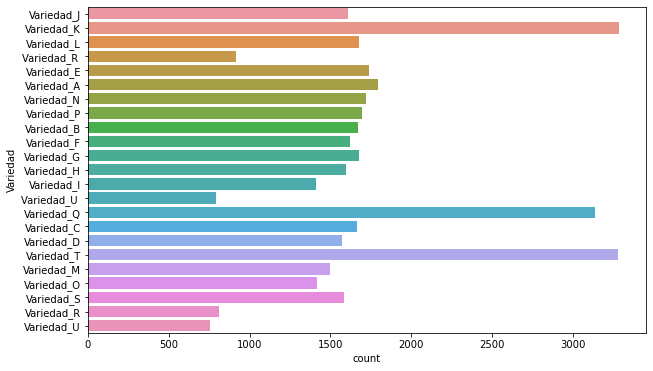

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='Variedad', data=df)

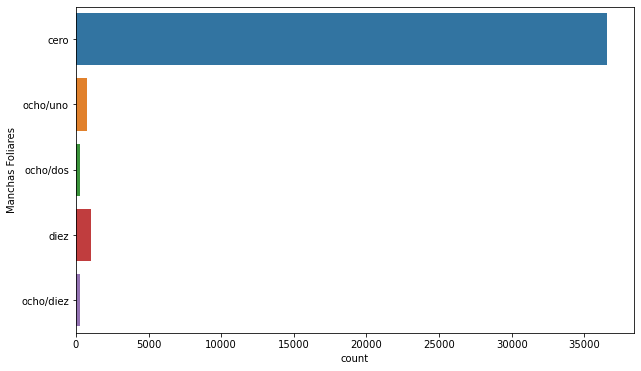

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='Manchas Foliares', data=df)

### 3 Distribuciones Estadísticas

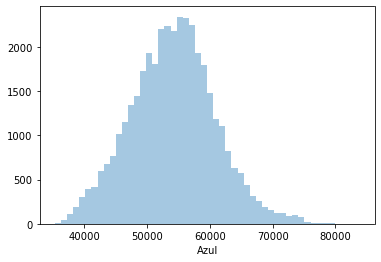

In [ ]:
# Distribucion de la banda expectral Azul 
sns.distplot(df.Azul, kde=False)

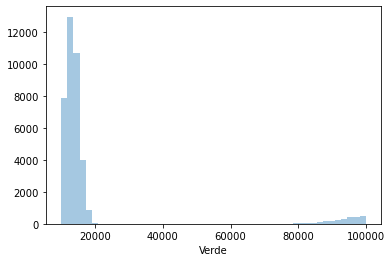

In [ ]:
# Distribucion de la banda espectral Verde
sns.distplot(df.Verde, kde=False)

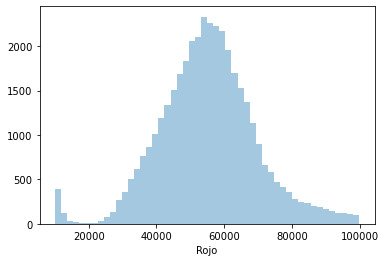

In [ ]:
# Distribucion de la banda expectral Rojo
sns.distplot(df.Rojo, kde=False)

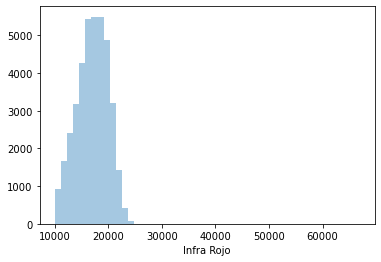

In [ ]:
# Distribucion de la banda expectral Infra Rojo
sns.distplot(df["Infra Rojo"], kde=False)

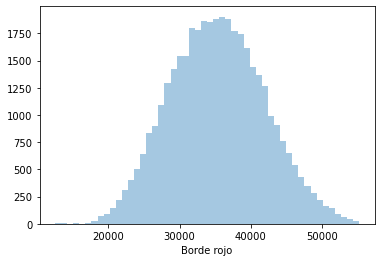

In [ ]:
# Distribucion de la banda expectral Borde Rojo
sns.distplot(df["Borde rojo"], kde=False)

Se verifica a continuacion cuales son las variables que no siguen una distribucion normal en el dataset.

In [ ]:
columnas_numericas = df.select_dtypes(['int', 'float']).columns
for num_col in columnas_numericas:
    _, pval = stats.normaltest(df[num_col])
    if(pval < 0.0001):
        print("Columna {} no sigue una distribución normal".format(num_col))
        

Columna ZADOCK no sigue una distribución normal
Columna NDVI no sigue una distribución normal
Columna NDRE no sigue una distribución normal
Columna SAVI no sigue una distribución normal
Columna SCCI no sigue una distribución normal
Columna GNDVI no sigue una distribución normal
Columna GVI no sigue una distribución normal
Columna RVI no sigue una distribución normal
Columna RedEdgeVI no sigue una distribución normal
Columna LNVI no sigue una distribución normal
Columna GRVI no sigue una distribución normal
Columna MGRVI no sigue una distribución normal
Columna NGRVI no sigue una distribución normal
Columna Adversidades no sigue una distribución normal
Columna Vuelco no sigue una distribución normal
Columna Altura no sigue una distribución normal
Columna Aspecto  no sigue una distribución normal
Columna Peso hecto no sigue una distribución normal
Columna Peso de 1000 granos no sigue una distribución normal
Columna hum no sigue una distribución normal


NOTA!!
Por alguna razon los datos de tipo float presentan p valores nulos, por lo que se rechaza la hipotesis de que las muestras provienen de una distribucion normal.

## Analisis de ZADOCK

Tomamos la variable categorica "Variedad" y calculamos las distribuciones condicionales para cada nivel de la misma

In [ ]:
pd.crosstab(df.Variedad, df.ZADOCK, normalize='index')

ZADOCK,3.9,4.1,4.3,4.5,4.7,5.1,5.3,5.4,5.5,5.7,5.8,5.9,6.1,6.3,6.5,6.6,6.7,6.9
Variedad,,,,,,,,,,,,,,,,,,
Variedad_A,0.000000,0.000000,0.475739,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.524261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Variedad_B,0.000000,0.469143,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.530857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Variedad_C,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.482614,0.000000,0.000000,0.000000,0.000000,0.000000,0.517386,0.000000
Variedad_D,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.481270,0.000000,0.000000,0.518730,0.000000,0.000000,0.000000
Variedad_E,0.000000,0.000000,0.000000,0.0,0.000000,0.457734,0.00000,0.000000,0.000000,0.000000,0.000000,0.542266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Variedad_F,0.000000,0.000000,0.000000,0.0,0.000000,0.455946,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.544054,0.000000,0.000000,0.000000
Variedad_G,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.470448,0.000000,0.000000,0.000000,0.529552,0.000000
Variedad_H,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Variedad_I,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.484741,0.000000,0.000000,0.000000,0.000000,0.000000,0.515259


In [ ]:
pd.crosstab(df.ZADOCK, df.Variedad, normalize='columns')

Variedad,Variedad_A,Variedad_B,Variedad_C,Variedad_D,Variedad_E,Variedad_F,Variedad_G,Variedad_H,Variedad_I,Variedad_J,...,Variedad_N,Variedad_O,Variedad_P,Variedad_Q,Variedad_R,Variedad_R,Variedad_S,Variedad_T,Variedad_U,Variedad_U
ZADOCK,,,,,,,,,,,,,,,,,,,,,
3.9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.471386,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
4.1,0.000000,0.469143,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
4.3,0.475739,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.422886,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
4.5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.00000,0.000000,0.0,0.0
4.7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.467714,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
5.1,0.000000,0.000000,0.000000,0.00000,0.457734,0.455946,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
5.3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
5.4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.577114,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
5.5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.528614,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0


Se realiza los diagramas de caja de la distribución ZADOCK para cada tipo de Variedad para observar como se distribuen sus valores.

Text(0.5, 1.0, 'Distribucion de ZADOCK segun variedad')

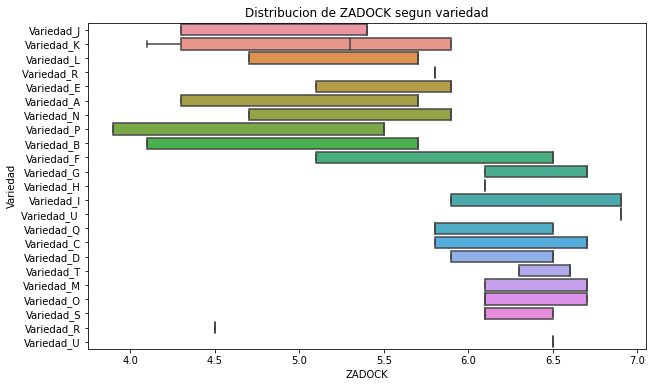

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ZADOCK', y='Variedad', data=df, orient='h')
plt.title('Distribucion de ZADOCK segun variedad')

Se observo un nivel no tan alto de solapamiento por lo cual inferimos que hay cierta relación entre las variables.

A continuación se busca observar como se relaciona la variable ZADOCK con las bandas espectrales según el tipo de ciclo.

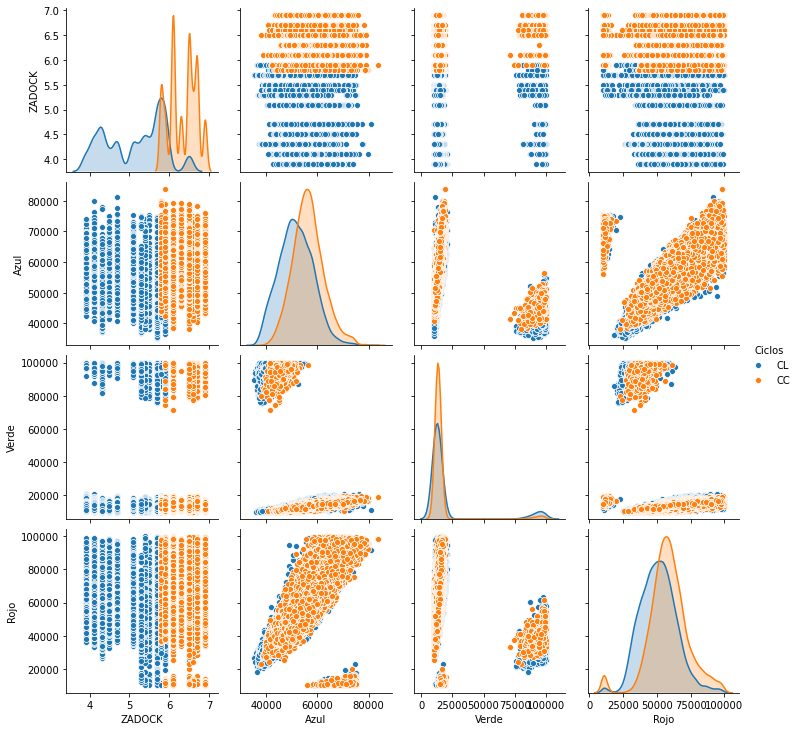

In [ ]:
sns.pairplot(data=df, vars=['ZADOCK','Azul', 'Verde', 'Rojo'], hue='Ciclos')
#plt.title('Relacion entre ZADOCK y Bandas Espectrales')

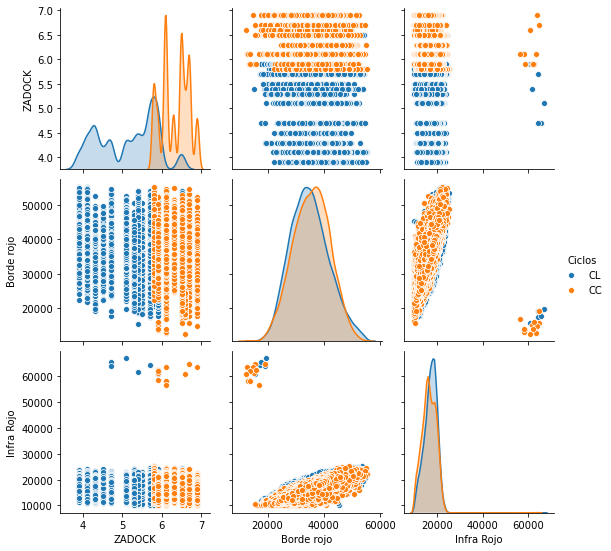

In [ ]:
sns.pairplot(data=df, vars=['ZADOCK', 'Borde rojo', 'Infra Rojo'], hue='Ciclos')

A simple vista no se observa relación alguna entre la variable ZADOCK y las bandas espectrales.

Es posible realizar una matriz de correlacion para observar la relacion entre ZADOCK y las bandas espectrales

In [ ]:
# Style dataframe in order to highlight hight correlation values
def color_high_corr(val):    
    return 'background-color: yellow' if 1-np.abs(val) < 0.35 else ''

In [ ]:
relacion_1 = df[['ZADOCK','Azul', 'Verde', 'Rojo', 'Borde rojo', 'Infra Rojo']]
cor_1 = relacion_1.corr()
highlighted_cor_1 = cor_1.style.applymap(color_high_corr)
highlighted_cor_1

,ZADOCK,Azul,Verde,Rojo,Borde rojo,Infra Rojo
ZADOCK,1.000000,0.148899,-0.045304,0.098109,-0.088980,-0.160921
Azul,0.148899,1.000000,-0.362824,0.673182,0.734495,0.369339
Verde,-0.045304,-0.362824,1.000000,-0.307640,-0.373834,-0.254258
Rojo,0.098109,0.673182,-0.307640,1.000000,0.566733,0.286562
Borde rojo,-0.088980,0.734495,-0.373834,0.566733,1.000000,0.740558
Infra Rojo,-0.160921,0.369339,-0.254258,0.286562,0.740558,1.000000


La relacion entre la escala ZADOCK y los indices espectrales se obtiene en forma de matriz

In [ ]:
relacion_2 = df[['ZADOCK','NDVI', 'NDRE', 'SAVI','SCCI', 'GNDVI', 'GVI', 'RVI',  'RedEdgeVI', 'LNVI', 'GRVI', 'MGRVI','NGRVI']]
cor_2 = relacion_2.corr()
highlighted_cor_2 = cor_2.style.applymap(color_high_corr)
highlighted_cor_2

,ZADOCK,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI
ZADOCK,1.000000,-0.144898,-0.107364,-0.144896,-0.004988,-0.031268,-0.089005,-0.082960,-0.106889,-0.086834,-0.050524,-0.036378,0.004213
NDVI,-0.144898,1.000000,0.383207,1.000000,-0.042714,-0.018799,0.088422,0.953678,0.370588,-0.018757,0.461071,0.410732,0.085263
NDRE,-0.107364,0.383207,1.000000,0.383210,0.044111,-0.038303,0.158492,0.205095,0.999360,-0.433136,0.256066,0.216462,0.013994
SAVI,-0.144896,1.000000,0.383210,1.000000,-0.042716,-0.018803,0.088418,0.953677,0.370591,-0.018762,0.461075,0.410735,0.085261
SCCI,-0.004988,-0.042714,0.044111,-0.042716,1.000000,0.005228,0.008765,-0.052835,0.043718,-0.007067,-0.020925,-0.022042,-0.007897
GNDVI,-0.031268,-0.018799,-0.038303,-0.018803,0.005228,1.000000,0.965367,-0.042358,-0.029709,0.497407,-0.891375,-0.913591,-0.147412
GVI,-0.089005,0.088422,0.158492,0.088418,0.008765,0.965367,1.000000,0.017691,0.166246,0.440419,-0.797136,-0.828224,-0.138107
RVI,-0.082960,0.953678,0.205095,0.953677,-0.052835,-0.042358,0.017691,1.000000,0.190982,0.016152,0.445595,0.413948,0.099184
RedEdgeVI,-0.106889,0.370588,0.999360,0.370591,0.043718,-0.029709,0.166246,0.190982,1.000000,-0.426668,0.244273,0.204467,0.011878
LNVI,-0.086834,-0.018757,-0.433136,-0.018762,-0.007067,0.497407,0.440419,0.016152,-0.426668,1.000000,-0.452422,-0.450435,-0.064384


Se realizan graficos de calor para observar las posibles relaciones entre variabels

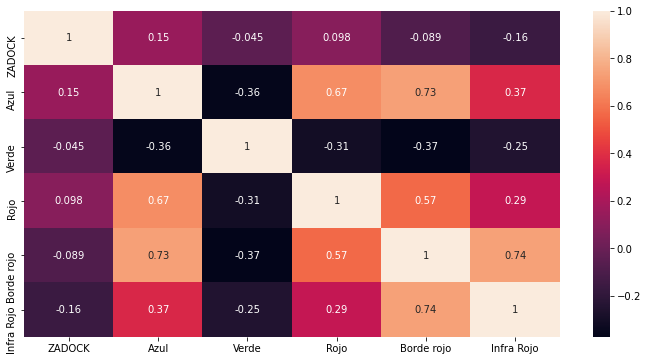

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.heatmap(relacion_1.corr(), annot=True)

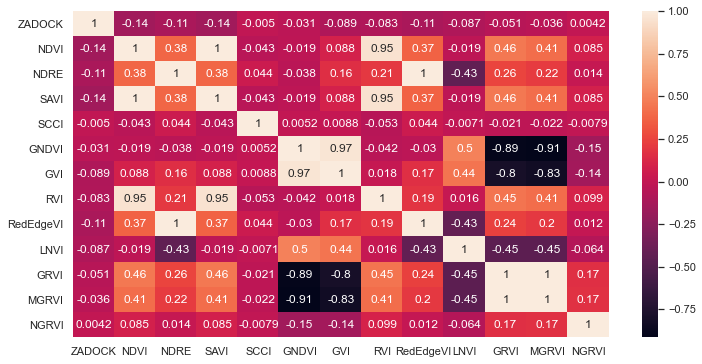

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.heatmap(cor_2, annot=True)

No se observa relacion entre la escala ZADOCK y las bandas e indices espectrales

Los valores mas altos de correlación se observan con las variables SAVI, NDVI, NDRE, Red Edge.

In [ ]:
rho, p_value = stats.spearmanr(df.ZADOCK, df['SAVI'], nan_policy = 'omit')
print('Coeficiente de Correlacion de Spearman: %.3f'%rho)

Coeficiente de Correlacion de Spearman: -0.319


In [ ]:
rho, p_value = stats.spearmanr(df.ZADOCK, df['NDVI'], nan_policy = 'omit')
print('Coeficiente de Correlacion de Spearman: %.3f'%rho)

Coeficiente de Correlacion de Spearman: -0.319


In [ ]:
rho, p_value = stats.spearmanr(df.ZADOCK, df['NDRE'], nan_policy = 'omit')
print('Coeficiente de Correlacion de Spearman: %.3f'%rho)

Coeficiente de Correlacion de Spearman: -0.143


In [ ]:
rho, p_value = stats.spearmanr(df.ZADOCK, df['RedEdgeVI'], nan_policy = 'omit')
print('Coeficiente de Correlacion de Spearman: %.3f'%rho)

Coeficiente de Correlacion de Spearman: -0.143


In [ ]:
other_num_features = num_feature.drop(['Azul', 'Verde', 'Rojo', 'Borde rojo', 'Infra Rojo', 'NDVI', 'NDRE', 'SAVI','SCCI', 'GNDVI', 'GVI', 'RVI', 'RedEdgeVI', 'LNVI', 'GRVI', 'MGRVI','NGRVI'])
cor_3=df[other_num_features].corr(method ='spearman').style.applymap(color_high_corr)
print("Correlación entre variables numéricas distintas a bandas e indices ")
cor_3

Correlación entre variables numéricas distintas a bandas e indices 


,ID,ZADOCK,Roya (%),Carbon (%),Adversidades,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
ID,1.000000,0.120467,-0.136390,-0.096102,-0.199255,0.211848,-0.011435,-0.006741,0.133642,-0.035137,0.576746,0.068863,0.584862,0.568431
ZADOCK,0.120467,1.000000,-0.111709,0.031271,0.387528,-0.329416,-0.215443,-0.181779,0.219092,0.671515,0.041483,0.382199,0.023007,0.034075
Roya (%),-0.136390,-0.111709,1.000000,-0.053488,0.172951,0.066103,0.148595,-0.101666,-0.214967,-0.071671,-0.357835,-0.160871,-0.341571,-0.354915
Carbon (%),-0.096102,0.031271,-0.053488,1.000000,-0.060837,0.085053,-0.014972,0.019667,-0.045756,0.014696,-0.032807,-0.048109,-0.037552,-0.036104
Adversidades,-0.199255,0.387528,0.172951,-0.060837,1.000000,-0.148494,-0.088752,-0.076379,0.036829,0.265461,-0.254666,0.131112,-0.262362,-0.258659
Vuelco,0.211848,-0.329416,0.066103,0.085053,-0.148494,1.000000,0.368593,-0.005337,-0.030672,-0.186155,0.059983,-0.155459,0.076826,0.072734
Altura,-0.011435,-0.215443,0.148595,-0.014972,-0.088752,0.368593,1.000000,0.040069,0.255129,-0.076871,-0.059801,0.120886,-0.059245,-0.044949
Aspecto,-0.006741,-0.181779,-0.101666,0.019667,-0.076379,-0.005337,0.040069,1.000000,-0.051203,-0.007842,0.088012,-0.064406,0.096820,0.078391
Peso hecto,0.133642,0.219092,-0.214967,-0.045756,0.036829,-0.030672,0.255129,-0.051203,1.000000,0.385317,0.234380,0.494811,0.214024,0.219964
Peso de 1000 granos,-0.035137,0.671515,-0.071671,0.014696,0.265461,-0.186155,-0.076871,-0.007842,0.385317,1.000000,-0.021778,0.355559,-0.039338,-0.038447


Otra variable que se analizo es la relacion entre la ZADOCK y Peso de 1000 granos

Text(0.5, 1.0, 'Gráfico de correlación de las variables ZADOCK y Peso de 1000 granos')

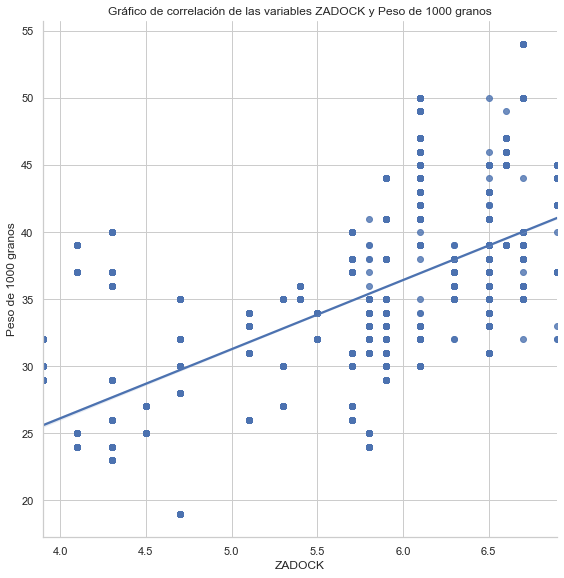

In [ ]:
sns.lmplot(data=df,x='ZADOCK',y='Peso de 1000 granos',height=8,aspect=1)
plt.title('Gráfico de correlación de las variables ZADOCK y Peso de 1000 granos')

In [ ]:
rho, p_value = stats.spearmanr(df.ZADOCK, df['Peso de 1000 granos'], nan_policy = 'omit')
print('Coeficiente de Correlacion de Spearman: %.3f'%rho)
alpha=0.05
if p_value>alpha:
    print('Las muestras no presentan correlacion (No se rechaza H0): p=%.3f'%p_value)
else:
    print('Las muestras estan correlacionadas (se rechaza H0): p=%.3f '%p_value)

Coeficiente de Correlacion de Spearman: 0.672
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


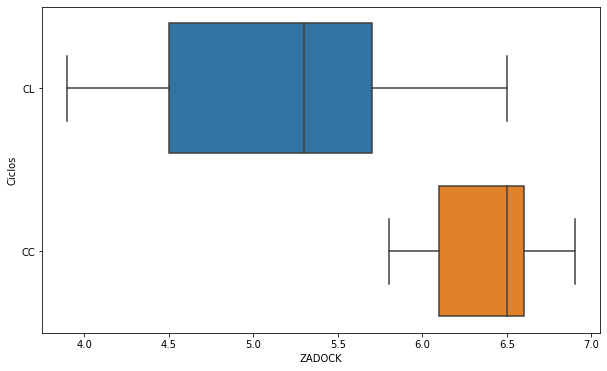

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ZADOCK', y='Ciclos', data=df, orient='h')

## Análisis de los rendimientos

Se realiza un histograma para ver como se agrupan los datos de la variable rendimiento

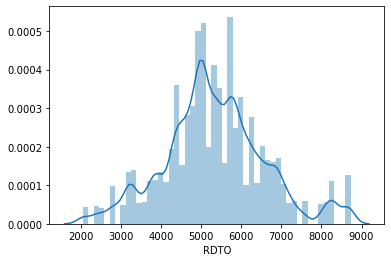

In [ ]:
sns.distplot(df.RDTO.dropna())

El rendimiento cambia según las variedades, por lo que se realiza un diagrama de caja para observar los valores que toma segun estas.

Text(0.5, 1.0, 'Distribucion de los rendimientos segun la variedad')

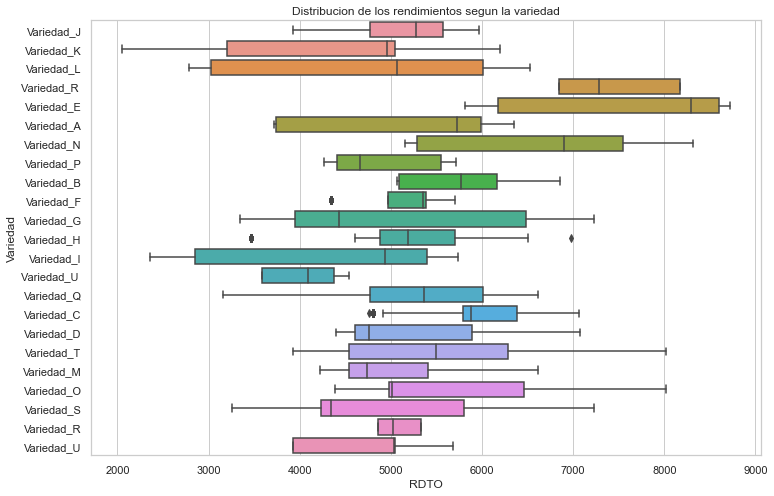

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
sns.boxplot(x='RDTO', y= 'Variedad', data=df, orient='h')
plt.title('Distribucion de los rendimientos segun la variedad')

A continuación se analiza si existe alguna relación entre rendimiento y ZADOCK.

Text(0.5, 1.0, 'Gráfico de correlación de las variables Rendimiento y ZADOCK')

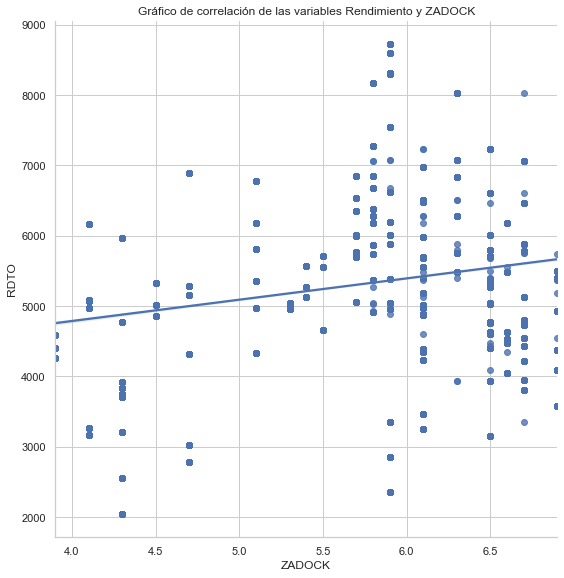

In [ ]:
sns.lmplot(data=df,x='ZADOCK',y='RDTO',height=8,aspect=1)
plt.title('Gráfico de correlación de las variables Rendimiento y ZADOCK')

A simple vista se observa una correlación muy debil entre ambas variables.

In [ ]:
rho, p_value = stats.spearmanr(df.ZADOCK, df.RDTO ,nan_policy = 'omit')
print('Coeficiente de Correlacion de Spearman: %.3f'%rho)
   

Coeficiente de Correlacion de Spearman: 0.034


El valor casi nulo del coeficiente de correlacion nos indica que no habria correlacion entre ambas variables

A continuación se procede a observar si existe alguna correlacion entre las variables rendimiento y Peso de grano.

Text(0.5, 1.0, 'Gráfico de correlación de las variables Rendimiento y p grano')

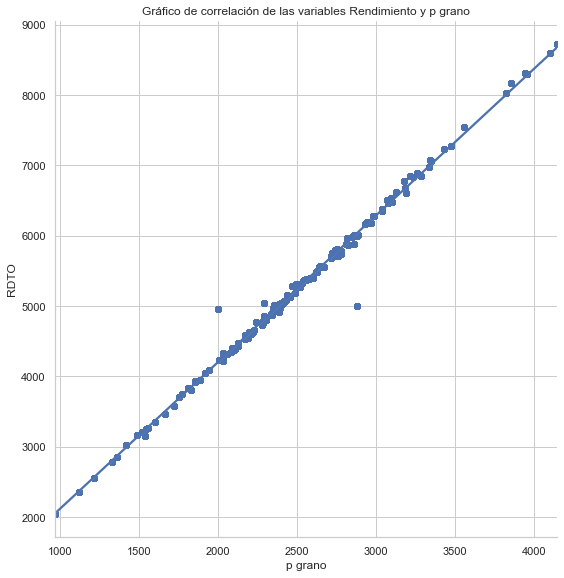

In [ ]:
sns.lmplot(data=df,x='p grano',y='RDTO',height=8,aspect=1)
plt.title('Gráfico de correlación de las variables Rendimiento y p grano')

Se observa una correlación muy fuerte a simple vista, por lo que se procede a calcular el coeficiente de correlacion.

In [ ]:
rho, p_value = stats.spearmanr(df.RDTO, df['p grano'], nan_policy = 'omit')
print('Coeficiente de Correlacion de Spearman: %.3f'%rho)
alpha=0.05
if p_value>alpha:
    print('Las muestras no presentan correlacion (No se rechaza H0): p=%.3f'%p_value)
else:
    print('Las muestras estan correlacionadas (se rechaza H0): p=%.3f '%p_value)
    

Coeficiente de Correlacion de Spearman: 0.990
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


In [ ]:
from scipy.stats import kendalltau
rho, p_value = kendalltau(df.RDTO, df['p grano'], nan_policy = 'omit')
print('Coeficiente de Correlacion de Kendall: %.3f'%rho)
alpha=0.05
if p_value>alpha:
    print('Las muestras no presentan correlacion (No se rechaza H0): p=%.3f'%p_value)
else:
    print('Las muestras estan correlacionadas (se rechaza H0): p=%.3f '%p_value)

Coeficiente de Correlacion de Kendall: 0.963
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


Text(0.5, 1.0, 'Distribucion de los rendimientos segun el tipo de ciclo')

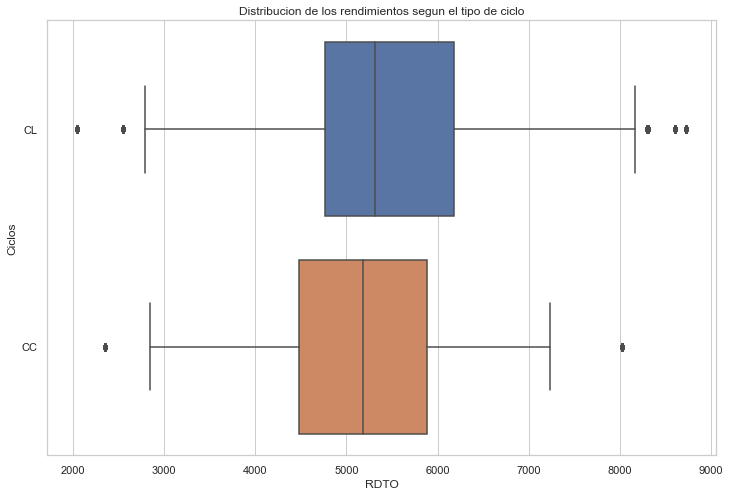

In [ ]:

plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
sns.boxplot(x='RDTO', y= 'Ciclos', data=df, orient='h')
plt.title('Distribucion de los rendimientos segun el tipo de ciclo')
# Acá es según ciclo, no variedad me parece

In [ ]:
def correlacion(dato_1, dato_2):
    rho, p_value = stats.spearmanr(dato_1, dato_2, nan_policy = 'omit')
    print('Coeficiente de Correlacion de Spearman: %.3f'%rho)
    alpha=0.05
    if p_value>alpha:
        print('Las muestras no presentan correlacion (No se rechaza H0): p=%.3f'%p_value)
    else:
        print('Las muestras estan correlacionadas (se rechaza H0): p=%.3f '%p_value)
    

In [ ]:
correlacion(df.RDTO, df['PAJUST'])

Coeficiente de Correlacion de Spearman: 0.991
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


El coeficiente de correlacion entre Rendimiento y Peso Ajustado es cercano a 1, lo que indica una fuerte correlacion entre estas dos variables.

Text(0.5, 1.0, 'Gráfico de correlación de las variables Rendimiento y Peso Ajustado')

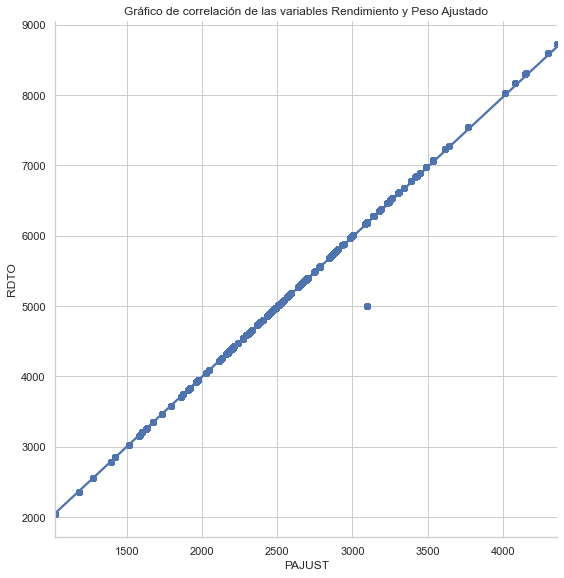

In [ ]:
sns.lmplot(data=df,x='PAJUST',y='RDTO',height=8,aspect=1)
plt.title('Gráfico de correlación de las variables Rendimiento y Peso Ajustado')

Otras variables que influyen en el rendimiento tambien se analizaron para ver el grado de correlacion.

In [ ]:
correlacion(df.RDTO, df['Peso hecto'])

Coeficiente de Correlacion de Spearman: 0.220
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


In [ ]:
correlacion(df.RDTO, df['Altura'])

Coeficiente de Correlacion de Spearman: -0.045
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


In [ ]:
correlacion(df.RDTO, df['Vuelco'])

Coeficiente de Correlacion de Spearman: 0.073
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


In [ ]:
correlacion(df.RDTO, df['hum'])

Coeficiente de Correlacion de Spearman: -0.069
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


In [ ]:
correlacion(df.RDTO, df['Aspecto '])

Coeficiente de Correlacion de Spearman: 0.078
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


Teniendo en cuenta el informe acerca del ensayo se analiza la relacion entre el rendimiento y algunos indices espectrales.

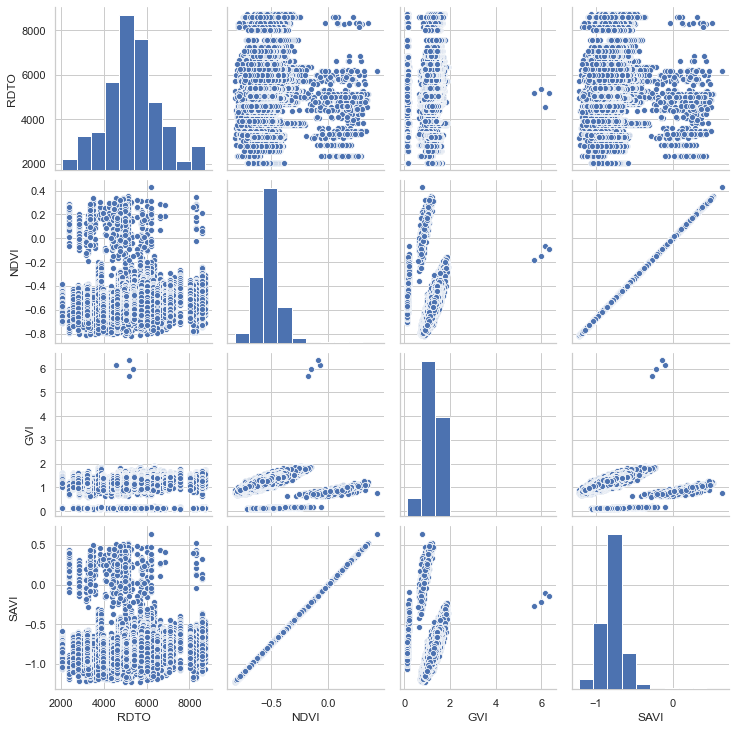

In [ ]:
sns.pairplot(data=df, vars=['RDTO', 'NDVI', 'GVI', 'SAVI'])

In [ ]:
correlacion(df.RDTO, df['NDVI'])

Coeficiente de Correlacion de Spearman: 0.324
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


In [ ]:
correlacion(df.RDTO, df['GVI'])

Coeficiente de Correlacion de Spearman: 0.266
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


In [ ]:
correlacion(df.RDTO, df['SAVI'])

Coeficiente de Correlacion de Spearman: 0.324
Las muestras estan correlacionadas (se rechaza H0): p=0.000 


#### ¿Cómo se distribuyen los rendimientos en el dataset de forma global, por columna,por fila,por parcela?

Text(0.5, 1.0, 'Distribución rendimiento')

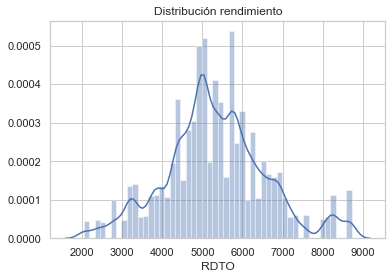

In [ ]:
rdto_general = df['RDTO']
sns.distplot(rdto_general).set_title('Distribución rendimiento')

Text(0.5, 1.0, 'Distribución rendimiento promedio por Parcela')

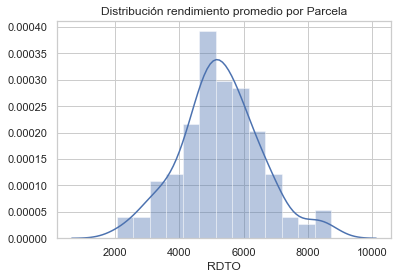

In [ ]:
rdto_by_parcela = df.groupby('Parcela')['RDTO'].mean()
sns.distplot(rdto_by_parcela).set_title('Distribución rendimiento promedio por Parcela')

Text(0.5, 1.0, 'Distribución rendimiento promedio por columna')

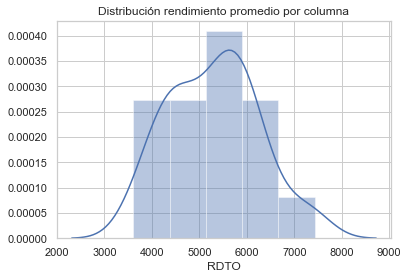

In [ ]:
rdto_by_columna = df.groupby('columna')['RDTO'].mean()
sns.distplot(rdto_by_columna).set_title('Distribución rendimiento promedio por columna')

Text(0.5, 1.0, 'Rendimiento promedio por fila')

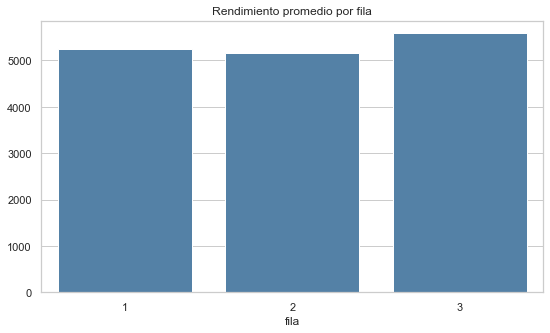

In [ ]:
rdto_by_fila = df.groupby('fila')['RDTO'].mean()
plt.figure(figsize=(9, 5))
sns.barplot(x=rdto_by_fila.index, y=rdto_by_fila.values, color='steelblue').set_title('Rendimiento promedio por fila')

#### ¿Las bandas expectrales,como se distribuyen por parcelas? 

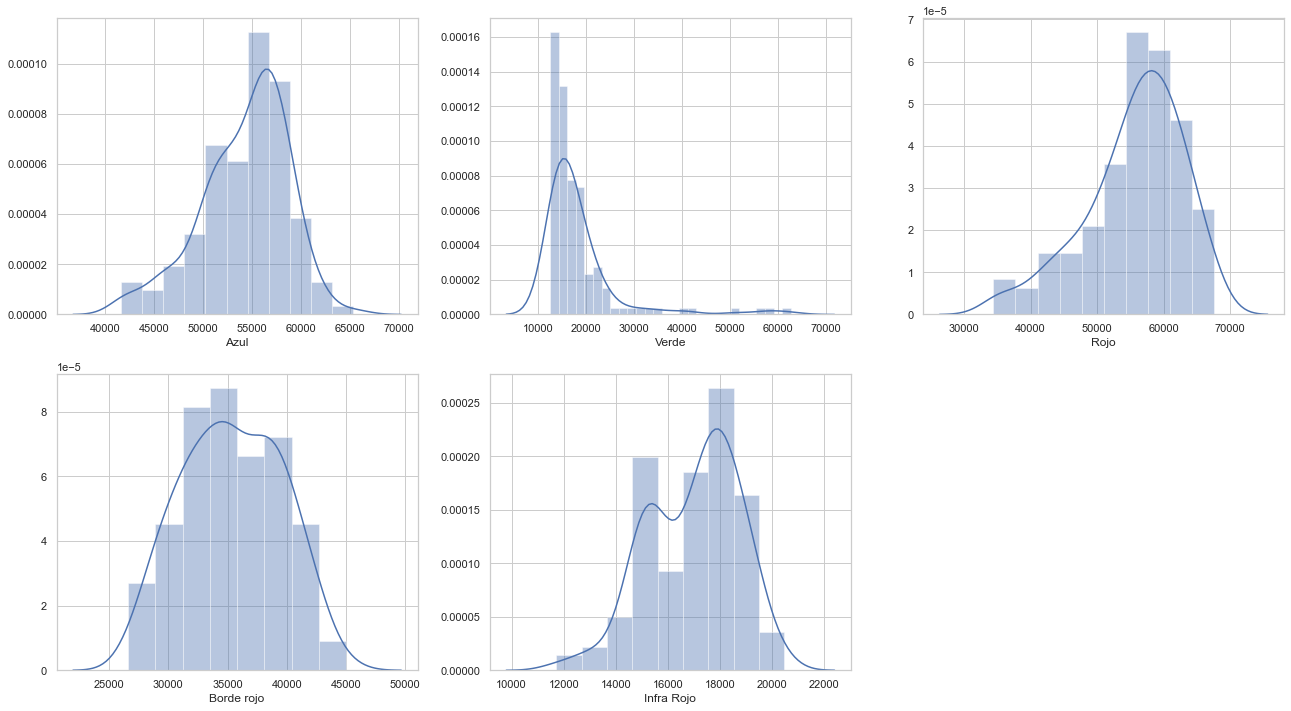

In [ ]:
bandas = ['Azul', 'Verde', 'Rojo', 'Borde rojo', 'Infra Rojo']
df_bandas_dict = { banda_col_name : df.groupby('Parcela')[banda_col_name].mean() for banda_col_name in bandas }

fig=plt.figure(figsize=(22,12))
columns = 3
rows = 2
i = 1
for key in df_bandas_dict.keys():
    fig.add_subplot(rows, columns, i)
    sns.distplot(df_bandas_dict[key])
    i = i + 1

plt.show()

#### ¿Los índices expectrales, como se distribuyen por parcelas?

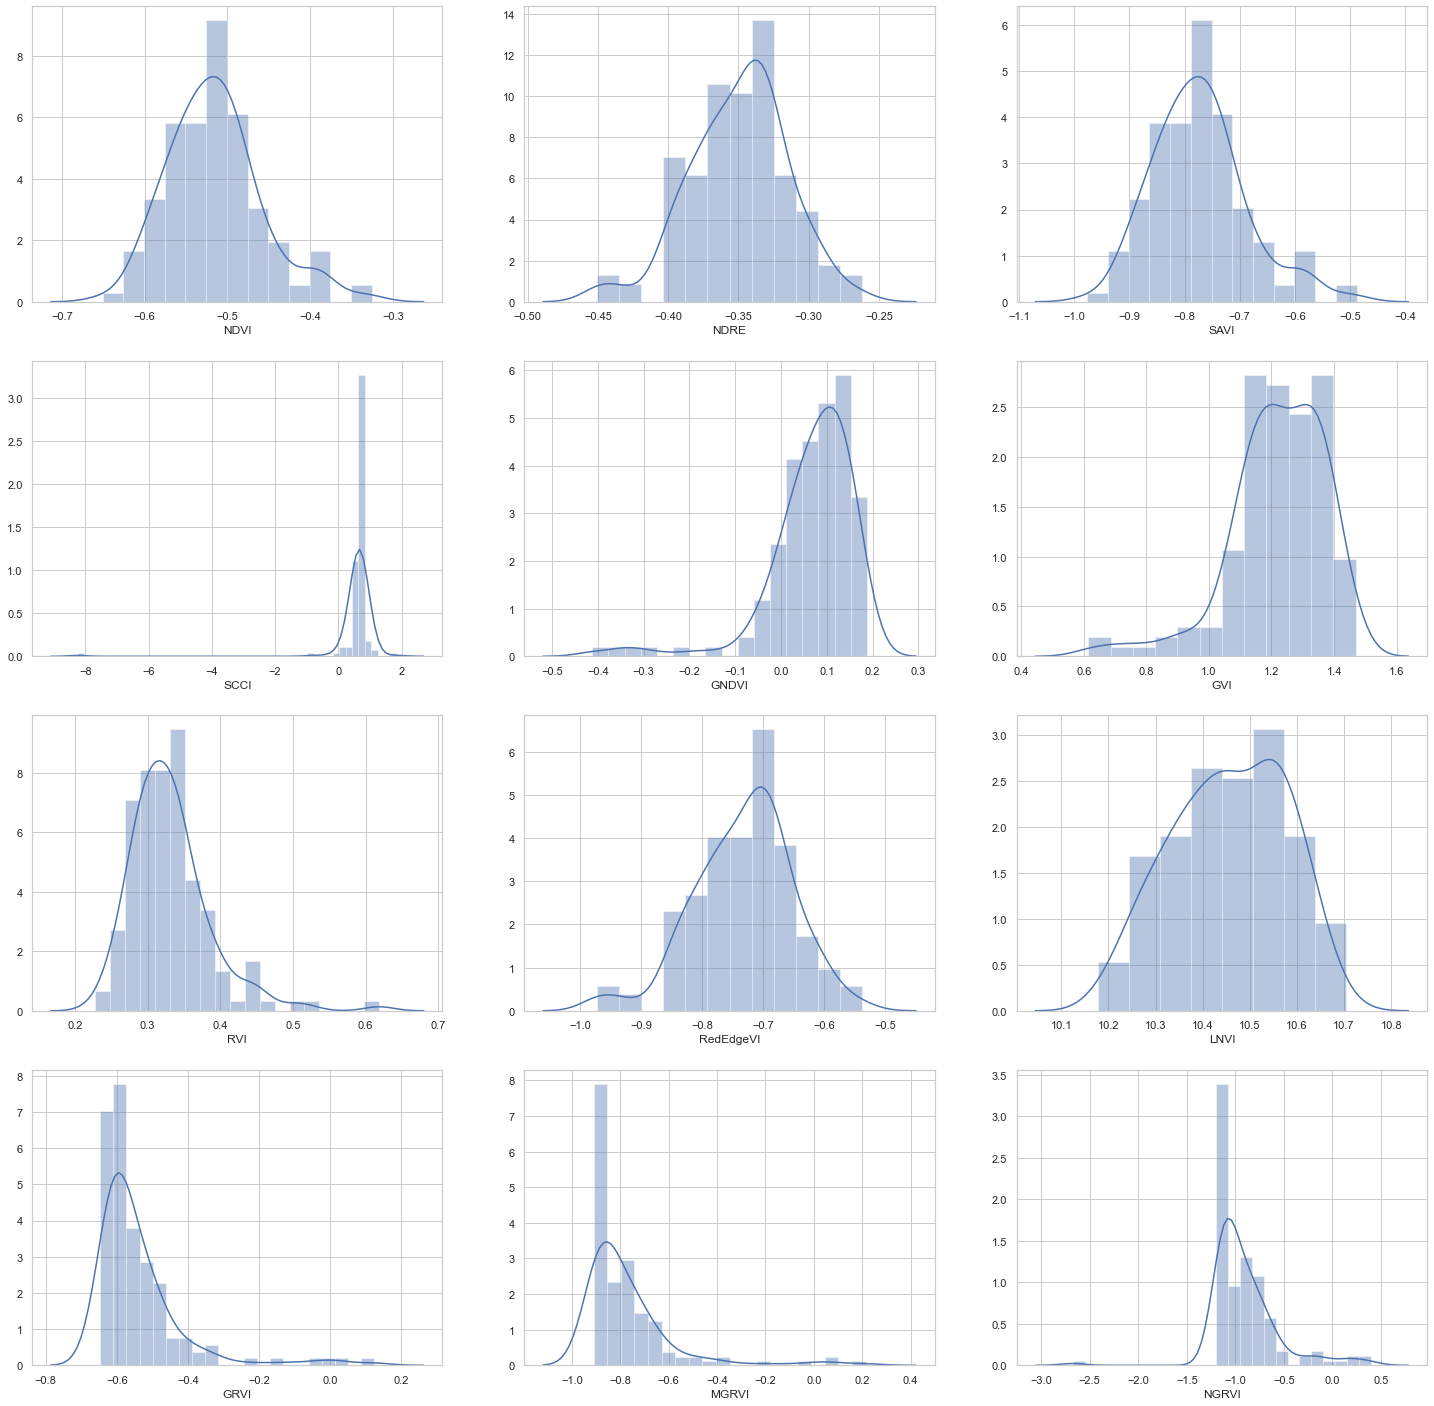

In [ ]:
indices_exp = ['NDVI', 'NDRE', 'SAVI','SCCI', 'GNDVI', 'GVI', 'RVI', 'RedEdgeVI', 'LNVI', 'GRVI', 'MGRVI','NGRVI']
df_indices_exp_dict = { indice_exp_col_name : df.groupby('Parcela')[indice_exp_col_name].mean() for indice_exp_col_name in indices_exp }

fig=plt.figure(figsize=(25,25))
columns = 3
rows = 4
i = 1
for key in df_indices_exp_dict.keys():
    fig.add_subplot(rows, columns, i)
    sns.distplot(df_indices_exp_dict[key])
    i = i + 1

plt.show()

## Observaciones

No se consideró que sean necesarios datos del diseño experimental en esta etapa del trabajo. De igual manera, tampoco se considera necesario transformar alguna de las variables numéricas en categóricas. 